<a href="https://colab.research.google.com/github/keithth/AI_Apps/blob/main/Haystack_Basics_with_Web_QA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haystack

*Notebook by [Bilge Yucel](https://www.linkedin.com/in/bilge-yucel/) for Code & Deploy. Watch the recording [here](https://www.linkedin.com/events/code-deploy-buildyourfirstgenai7226658275792932864/comments/)*

* [📘 Documentation](https://docs.haystack.deepset.ai/docs)
* [🧑‍🏫 Tutorials](https://haystack.deepset.ai/tutorials)
* [🧑‍🍳 Cookbooks](https://github.com/deepset-ai/haystack-cookbook)

[Haystack](https://haystack.deepset.ai/) is an open source framework for building production-ready LLM applications:

* Semantic Search
* Retrieval Augmented Generation
* Conversational Systems
* ...

## Building Blocks 🧱

* Components & Pipelines
* Components: Embedders, Retrievers, Generators, Converters, Routers...
* Pipelines are Directed Graphs: loops, branches ✅

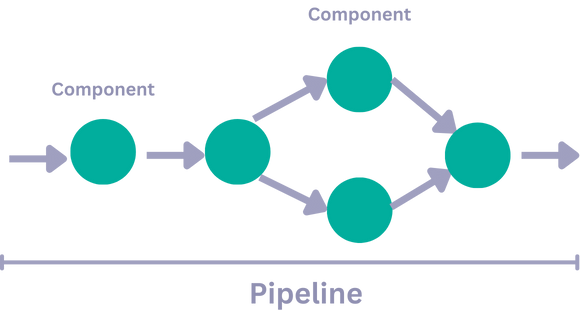



## Let's Build a Web QA System

* A system to ask questions to the given url content

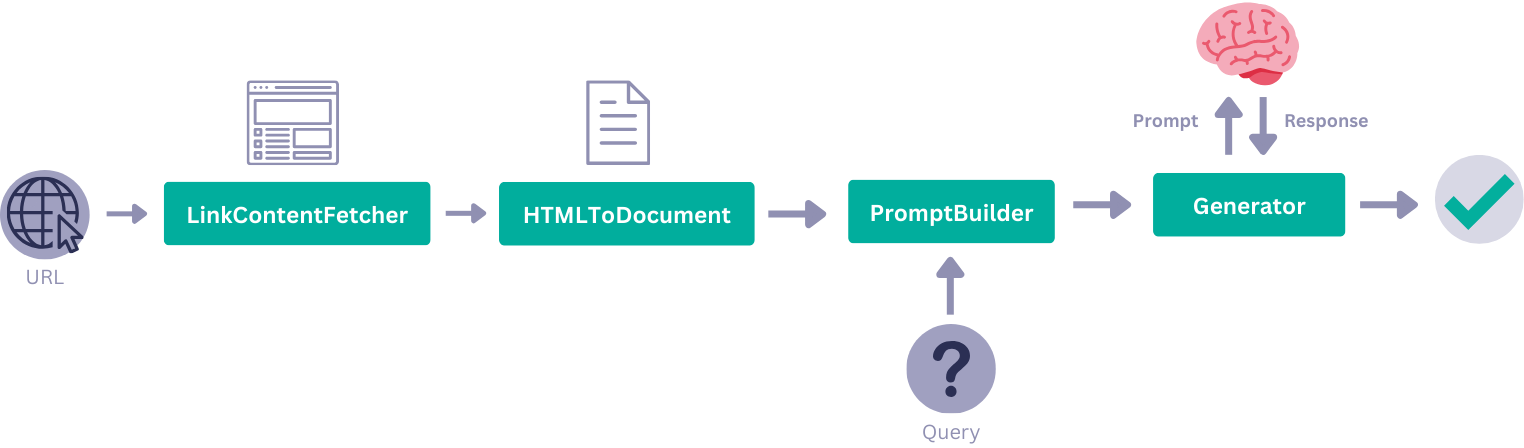

In [2]:
!pip install -qU haystack-ai trafilatura

In [3]:
import os
from getpass import getpass

os.environ["HF_API_TOKEN"] = getpass('HF_API_TOKEN')

HF_API_TOKEN··········


In [10]:
import os
from getpass import getpass

os.environ["HUGGINGFACEHUB_API_TOKEN"] = getpass('Enter your Hugging Face API token: ')

Enter your Hugging Face API token: ··········


In [4]:
## Components & Pipelines
from haystack.components.fetchers import LinkContentFetcher

fetcher = LinkContentFetcher()
web_content =  fetcher.run(["https://haystack.deepset.ai/overview/quick-start"])


In [5]:
web_content

{'streams': [ByteStream(data=b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n  <meta charset="utf-8" />\n  <meta name="viewport" content...', meta={'content_type': 'text/html', 'url': 'https://haystack.deepset.ai/overview/quick-start'}, mime_type='text/html')]}

In [6]:
from haystack.components.converters import HTMLToDocument

converter = HTMLToDocument()
converter.run(sources=web_content["streams"])


{'documents': [Document(id=3daa4914d6adb4e65771bb4d6210b500d2a0be45e71c167d68e89916d81a97b0, content: 'Get Started
  Haystack is an open-source AI framework to build custom production-grade LLM application...', meta: {'content_type': 'text/html', 'url': 'https://haystack.deepset.ai/overview/quick-start'})]}

In [7]:
from haystack.components.builders import PromptBuilder

prompt = """
Answer the question based on the given documents

Documents:
{%  for doc in docs %}
 {{doc.content}}
{% endfor %}

Question: {{question}}
"""

prompt_builder = PromptBuilder(prompt)

In [21]:
llm.run("What is capital of Germany?")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/inference/_client.py:2279: FutureWarning: `stop_sequences` is a deprecated argument for `text_generation` task and will be removed in version '0.28.0'. Use `stop` instead.
  warnings.warn(


HfHubHTTPError: 401 Client Error: Unauthorized for url: https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.3 (Request ID: ZfsCIY)

401 Unauthorized

In [12]:
from haystack import Pipeline

pipeline = Pipeline()

pipeline.add_component("fetcher", fetcher)
pipeline.add_component("converter", converter)
pipeline.add_component("prompt_builder", prompt_builder)
pipeline.add_component("llm", llm)

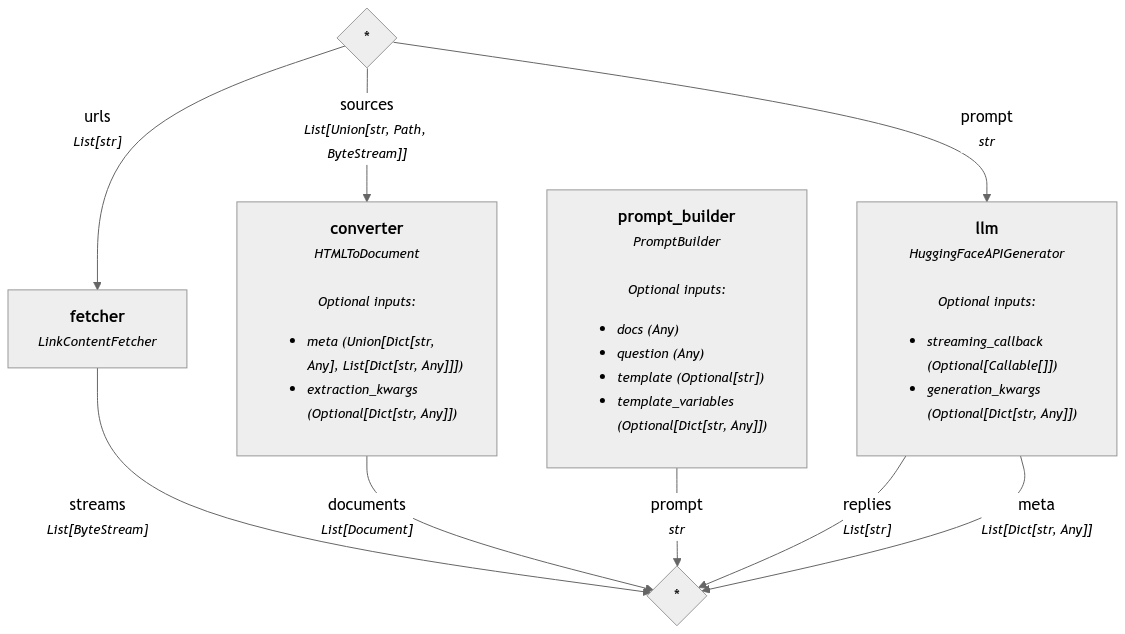

In [13]:
pipeline.show()

In [14]:
pipeline.connect("fetcher.streams", "converter.sources")
pipeline.connect("converter", "prompt_builder.docs")
pipeline.connect("prompt_builder", "llm")

🚅 Components
  - fetcher: LinkContentFetcher
  - converter: HTMLToDocument
  - prompt_builder: PromptBuilder
  - llm: HuggingFaceAPIGenerator
🛤️ Connections
  - fetcher.streams -> converter.sources (List[ByteStream])
  - converter.documents -> prompt_builder.docs (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)

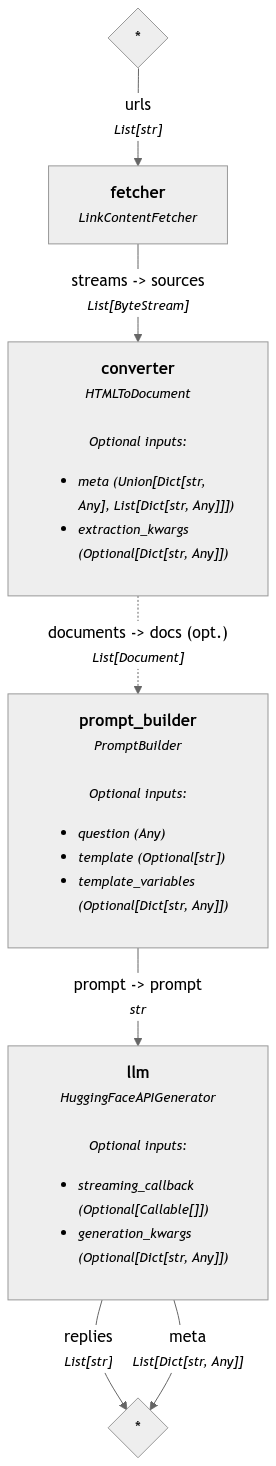

In [15]:
pipeline.show()

In [22]:
pipeline.run(data={"fetcher":{"urls":["https://haystack.deepset.ai/overview/quick-start"]},
                   "prompt_builder":{"question":"Which components are needed for a RAG application?"}
                   })

HfHubHTTPError: 401 Client Error: Unauthorized for url: https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.3 (Request ID: ie9WeI)

401 Unauthorized

In [23]:
pipeline.run(data={"fetcher":{"urls":["https://haystack.deepset.ai/overview/quick-start"]},
                   "prompt_builder":{"question":"Which components are needed for a RAG application?"}
                   }, include_outputs_from={"prompt_builder"})

/usr/local/lib/python3.11/dist-packages/huggingface_hub/inference/_client.py:2279: FutureWarning: `stop_sequences` is a deprecated argument for `text_generation` task and will be removed in version '0.28.0'. Use `stop` instead.
  warnings.warn(


HfHubHTTPError: 401 Client Error: Unauthorized for url: https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.3 (Request ID: ZA01Ts)

401 Unauthorized

## Custom Components

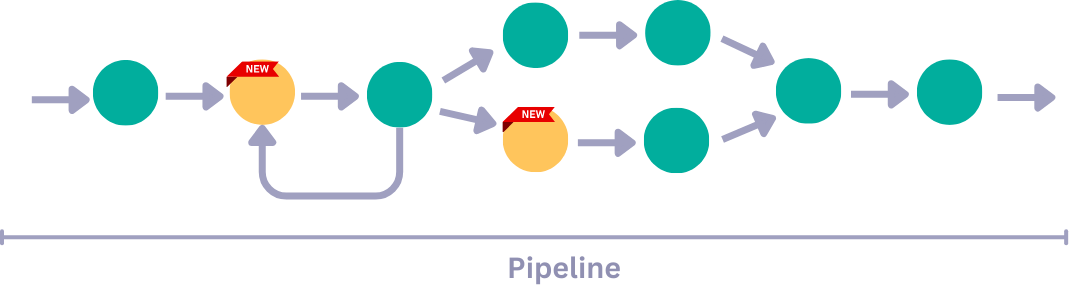

In [24]:
from haystack import component

@component
class MyCustomComponent:

  @component.output_types(text=str)
  def run(self, name:str):
    text = f'Hello, my name is {name}'

    return {"text": text}

In [25]:
my_component = MyCustomComponent()
my_component.run("Bilge")

{'text': 'Hello, my name is Bilge'}